In [99]:
#Load Data
#Data source, https://www.kaggle.com/datasets/madhansing/bank-loan2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('madfhantr.csv')
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
df.shape

(614, 13)

In [101]:
df.dropna(inplace=True)

In [102]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [103]:
 df = df.drop(['Loan_ID'], axis = 1)

In [104]:
# check the unique values of each column
for column in df:
    print(df[column].value_counts())

Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: ApplicantIncome, Length: 405, dtype: int64
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: CoapplicantIncome, Length: 232, dtype: int64
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 186, dtype: int64
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64
1.0 

In [105]:
# Data Processing for each column
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome'], axis = 1)




df['Gender'].replace(['Male', 'Female'],[1, 0], inplace = True)

df['Married'].replace(['Yes', 'No'],[1, 0], inplace = True)

df['Dependents'].replace(['3+'],[3], inplace = True)

df['Self_Employed'].replace(['Yes', 'No'],[1, 0], inplace = True)

df['Education'].replace(['Graduate', 'Not Graduate'],[1, 0], inplace = True)

df['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[2, 1, 0], inplace = True)

df['Loan_Status'].replace(['Y', 'N'],[1, 0], inplace = True)

In [106]:
print(df.head())
print(df.dtypes)

   Gender  Married Dependents  Education  Self_Employed  LoanAmount  \
1       1        1          1          1              0       128.0   
2       1        1          0          1              1        66.0   
3       1        1          0          0              0       120.0   
4       1        0          0          1              0       141.0   
5       1        1          2          1              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  TotalIncome  
1             360.0             1.0              2            0       6091.0  
2             360.0             1.0              0            1       3000.0  
3             360.0             1.0              0            1       4941.0  
4             360.0             1.0              0            1       6000.0  
5             360.0             1.0              0            1       9613.0  
Gender                int64
Married               int64
Dependents           object
Education      

In [107]:
# Dependents are object and shall be changed to numeric.
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [108]:
df['Dependents'] = df['Dependents'].astype('int')

In [109]:
df.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
TotalIncome         float64
dtype: object

In [110]:
# get x, y
x = df.drop(['Loan_Status'], axis = 1)
y = df.loc[:, 'Loan_Status']

print(x.head())
print(y.head())

   Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
1       1        1           1          1              0       128.0   
2       1        1           0          1              1        66.0   
3       1        1           0          0              0       120.0   
4       1        0           0          1              0       141.0   
5       1        1           2          1              1       267.0   

   Loan_Amount_Term  Credit_History  Property_Area  TotalIncome  
1             360.0             1.0              2       6091.0  
2             360.0             1.0              0       3000.0  
3             360.0             1.0              0       4941.0  
4             360.0             1.0              0       6000.0  
5             360.0             1.0              0       9613.0  
1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64


In [111]:
# training, testing split. 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify = y)

In [112]:
x_train.shape

(336, 10)

In [113]:
# balance the training data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  # call the method

oversampled_x,oversampled_y=os.fit_sample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

(336, 10)
(464, 10)


In [114]:
# build the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)  # tree depth.
# the default algorithm is using Gini Impurity. However, you can choose entropy by specifying the criterion.
# clf2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf.fit(oversampled_x,oversampled_y)

DecisionTreeClassifier(max_depth=3)

In [115]:
# get the accuracy score
clf.score(x_test,y_test)

0.8472222222222222

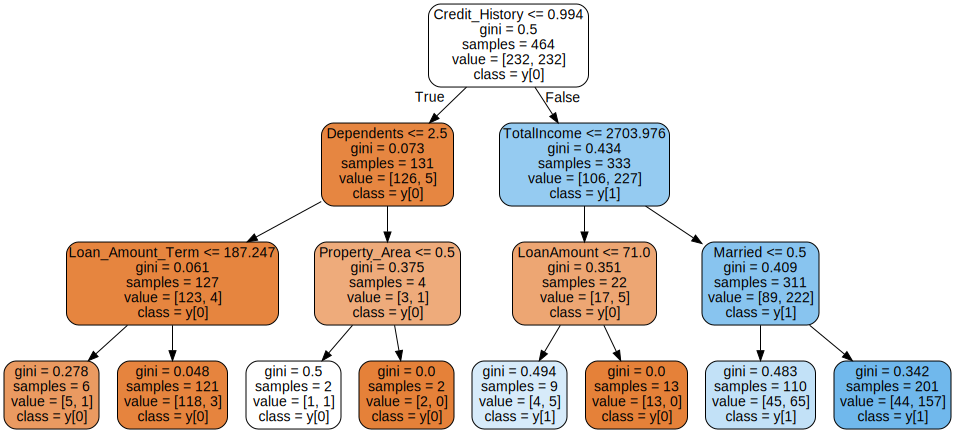

In [124]:
# Visualize the decision tree. 
import graphviz 
dot_data = tree.export_graphviz(clf,
                                feature_names=['Gender','Married', 'Dependents', 'Education','Self_Employed','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',  'TotalIncome' ],
                            class_names = True, filled=True,
                                rounded=True ) 
graph = graphviz.Source(dot_data)
graph.render("gini")
graph